In [1]:
from cymetric import timeseries as com
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
import cymetric as cym
db = cym.dbopen('cyclus.sqlite')
ev = cym.Evaluator(db=db, write=False)

In [3]:
def month2year(df, mode=0, division=12):
    dfn = pd.DataFrame(columns=['Time','Mass'])
    val = 0
    for index, row in df.iterrows():
        if mode == 0:
            val = row['Mass']
        else:
            val += row['Mass']
        if row['Time'] % division == 0:
            if mode == 2:
                val *= 1./double(division)
            dfn.loc[int(row['Time'] / division)] = int(row['Time'] / 12)
            dfn.loc[int(row['Time'] / division)]['Mass'] = val
            val = 0
    return dfn

In [4]:
FBR_dr_trans = month2year(com.transactions(ev, receivers=['FBR_driver']),1, 4*12)
FBR_dr_trans_LEU = month2year(com.transactions(ev, receivers=['FBR_driver'], commodities=['FBR_LEU_N'] ), 1, 4*12)
FBR_dr_trans_N_1 = month2year(com.transactions(ev, receivers=['FBR_driver'], commodities=['FBR_MOX_N_1'] ), 1, 4*12)
FBR_dr_trans_N_2 = month2year(com.transactions(ev, receivers=['FBR_driver'], commodities=['FBR_MOX_N_2'] ), 1, 4*12)
FBR_dr_trans_N_3 = month2year(com.transactions(ev, receivers=['FBR_driver'], commodities=['FBR_MOX_N_3'] ), 1, 4*12)
FBR_dr_trans_N_4 = month2year(com.transactions(ev, receivers=['FBR_driver'], commodities=['FBR_MOX_N_4'] ), 1, 4*12)
FBR_dr_trans_N = month2year(com.transactions(ev, receivers=['FBR_driver'], commodities=['FBR_MOX_N'] ), 1, 4*12)

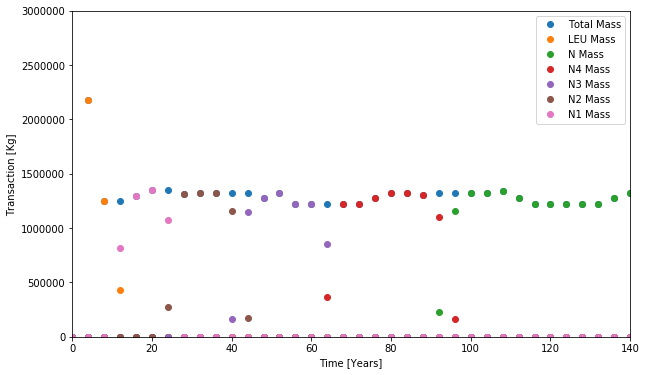

In [5]:
FBR_dr_trans_dat = pd.DataFrame({'Time': FBR_dr_trans.Time, 'Total Mass': FBR_dr_trans.Mass})
FBR_dr_trans_LEU_dat = pd.DataFrame({'Time': FBR_dr_trans_LEU.Time, 'LEU Mass': FBR_dr_trans_LEU.Mass})
FBR_dr_trans_N1_dat = pd.DataFrame({'Time': FBR_dr_trans_N_1.Time, 'N1 Mass': FBR_dr_trans_N_1.Mass})
FBR_dr_trans_N2_dat = pd.DataFrame({'Time': FBR_dr_trans_N_2.Time, 'N2 Mass': FBR_dr_trans_N_2.Mass})
FBR_dr_trans_N3_dat = pd.DataFrame({'Time': FBR_dr_trans_N_3.Time, 'N3 Mass': FBR_dr_trans_N_3.Mass})
FBR_dr_trans_N4_dat = pd.DataFrame({'Time': FBR_dr_trans_N_4.Time, 'N4 Mass': FBR_dr_trans_N_4.Mass})
FBR_dr_trans_N_dat = pd.DataFrame({'Time': FBR_dr_trans_N.Time, 'N Mass': FBR_dr_trans_N.Mass})


e1x = FBR_dr_trans_dat.plot(x='Time', y='Total Mass', figsize=(10, 6), linestyle=' ', marker='o')
FBR_dr_trans_LEU_dat.plot(x='Time', y='LEU Mass', ax=e1x, marker='o', linestyle=' ')
FBR_dr_trans_N_dat.plot(x='Time', y='N Mass', ax=e1x,  marker='o', linestyle=' ')
FBR_dr_trans_N4_dat.plot(x='Time', y='N4 Mass', ax=e1x,  marker='o', linestyle=' ')
FBR_dr_trans_N3_dat.plot(x='Time', y='N3 Mass', ax=e1x,  marker='o', linestyle=' ')
FBR_dr_trans_N2_dat.plot(x='Time', y='N2 Mass', ax=e1x,  marker='o', linestyle=' ')
FBR_dr_trans_N1_dat.plot(x='Time', y='N1 Mass', ax=e1x,  marker='o', linestyle=' ')






#FBR_dr_trans_LEU_dat.plot(x='Time', y='LEU Mass', ax=e1x)




plt.ylim([0,3000000])
plt.xlim([0,140])
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')
plt.savefig('trans.png', dpi=326)
plt.legend()


In [6]:
FBR_dr_trans_N_1_blk = month2year(com.transactions(ev, receivers=['FAB_1'], commodities=['blk_tru_str'] ), 1)
FBR_dr_trans_N_2_blk = month2year(com.transactions(ev, receivers=['FAB_2'], commodities=['blk_tru_str'] ), 1)
FBR_dr_trans_N_3_blk = month2year(com.transactions(ev, receivers=['FAB_3'], commodities=['blk_tru_str'] ), 1)
FBR_dr_trans_N_4_blk = month2year(com.transactions(ev, receivers=['FAB_4'], commodities=['blk_tru_str'] ), 1)


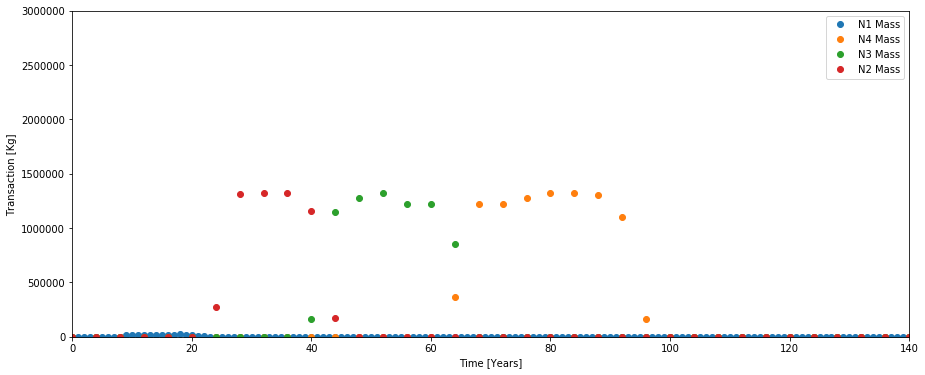

In [7]:
FBR_dr_trans_N1_blk_dat = pd.DataFrame({'Time': FBR_dr_trans_N_1_blk.Time, 'N1 Mass': FBR_dr_trans_N_1_blk.Mass})
FBR_dr_trans_N2_blk_dat = pd.DataFrame({'Time': FBR_dr_trans_N_2_blk.Time, 'N2 Mass': FBR_dr_trans_N_2_blk.Mass})
FBR_dr_trans_N3_blk_dat = pd.DataFrame({'Time': FBR_dr_trans_N_3_blk.Time, 'N3 Mass': FBR_dr_trans_N_3_blk.Mass})
FBR_dr_trans_N4_blk_dat = pd.DataFrame({'Time': FBR_dr_trans_N_4_blk.Time, 'N4 Mass': FBR_dr_trans_N_4_blk.Mass})


e1x = FBR_dr_trans_N1_blk_dat.plot(x='Time', y='N1 Mass', figsize=(15, 6), linestyle=' ', marker='o')
FBR_dr_trans_N4_dat.plot(x='Time', y='N4 Mass', ax=e1x,  marker='o', linestyle=' ')
FBR_dr_trans_N3_dat.plot(x='Time', y='N3 Mass', ax=e1x,  marker='o', linestyle=' ')
FBR_dr_trans_N2_dat.plot(x='Time', y='N2 Mass', ax=e1x,  marker='o', linestyle=' ')






#FBR_dr_trans_LEU_dat.plot(x='Time', y='LEU Mass', ax=e1x)




plt.ylim([0,3000000])
plt.xlim([0,140])
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')
plt.savefig('trans.png', dpi=326)
plt.legend()

In [8]:
fab_inv_N_1 = com.inventories(ev, facilities=['FAB_1'])
fab_inv_N_2 = com.inventories(ev, facilities=['FAB_2'])
fab_inv_N_3 = com.inventories(ev, facilities=['FAB_3'])
fab_inv_N_4 = com.inventories(ev, facilities=['FAB_4'])


/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/timeseries.py:134: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


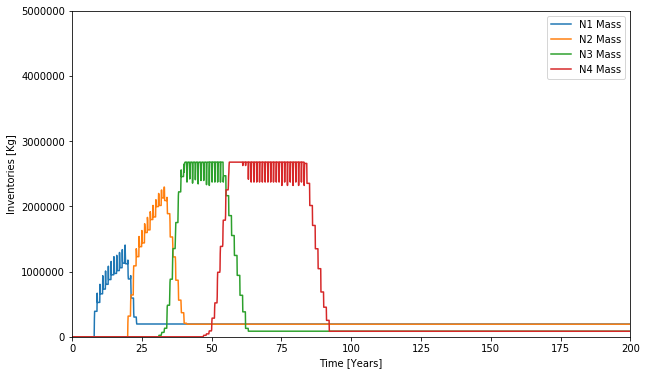

In [9]:
fab_inv_N1_dat = pd.DataFrame({'Time': fab_inv_N_1.Time/12., 'N1 Mass': fab_inv_N_1.Mass})
fab_inv_N2_dat = pd.DataFrame({'Time': fab_inv_N_2.Time/12., 'N2 Mass': fab_inv_N_2.Mass})
fab_inv_N3_dat = pd.DataFrame({'Time': fab_inv_N_3.Time/12., 'N3 Mass': fab_inv_N_3.Mass})
fab_inv_N4_dat = pd.DataFrame({'Time': fab_inv_N_4.Time/12., 'N4 Mass': fab_inv_N_4.Mass})



e1x = fab_inv_N1_dat.plot(x='Time', y='N1 Mass', figsize=(10, 6))
fab_inv_N2_dat.plot(x='Time', y='N2 Mass', ax=e1x)
fab_inv_N3_dat.plot(x='Time', y='N3 Mass', ax=e1x)
fab_inv_N4_dat.plot(x='Time', y='N4 Mass', ax=e1x)





plt.ylim([0,5000000])
plt.xlabel('Time [Years]')
plt.ylabel('Inventories [Kg]')
plt.savefig('inv.png', dpi=326)

In [21]:
sep_inv_N_0 = com.inventories(ev, facilities=['SEP_0'])
sep_inv_N_1 = com.inventories(ev, facilities=['SEP_1'])
sep_inv_N_2 = com.inventories(ev, facilities=['SEP_2'])
sep_inv_N_3 = com.inventories(ev, facilities=['SEP_3'])
sep_inv_N_4 = com.inventories(ev, facilities=['SEP_4'])
sep_inv_N = com.inventories(ev, facilities=['SEP'])
blk_inv = com.inventories(ev, facilities=['Storage_blk_tru'])
sep_inv_str_pwr_tru = com.inventories(ev, facilities=['Storage_pwr_tru'])



/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/timeseries.py:134: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


In [1]:
sep_inv_N0_dat = pd.DataFrame({'Time': sep_inv_N_0.Time/12., 'N0 Mass': sep_inv_N_0.Mass})
sep_inv_N1_dat = pd.DataFrame({'Time': sep_inv_N_1.Time/12., 'N1 Mass': sep_inv_N_1.Mass})
sep_inv_N2_dat = pd.DataFrame({'Time': sep_inv_N_2.Time/12., 'N2 Mass': sep_inv_N_2.Mass})
sep_inv_N3_dat = pd.DataFrame({'Time': sep_inv_N_3.Time/12., 'N3 Mass': sep_inv_N_3.Mass})
sep_inv_N4_dat = pd.DataFrame({'Time': sep_inv_N_4.Time/12., 'N4 Mass': sep_inv_N_4.Mass})
sep_inv_N_dat =  pd.DataFrame({'Time': sep_inv_N.Time/12., 'N Mass': sep_inv_N.Mass})
blk_inv_dat =  pd.DataFrame({'Time': blk_inv.Time/12., 'Blk Mass': blk_inv.Mass})
sep_inv_str_pwr_tru_dat = pd.DataFrame({'Time': sep_inv_str_pwr_tru.Time/12., 'pwr Mass': sep_inv_str_pwr_tru.Mass})




e1x = sep_inv_N0_dat.plot(x='Time', y='N0 Mass', figsize=(10, 6))
sep_inv_N1_dat.plot(x='Time', y='N1 Mass', ax=e1x)
sep_inv_N2_dat.plot(x='Time', y='N2 Mass', ax=e1x)
sep_inv_N3_dat.plot(x='Time', y='N3 Mass', ax=e1x)
sep_inv_N4_dat.plot(x='Time', y='N4 Mass', ax=e1x)
sep_inv_N_dat.plot(x='Time', y='N Mass', ax=e1x)
blk_inv_dat.plot(x='Time', y='Blk Mass', ax=e1x)
sep_inv_str_pwr_tru_dat.plot(x='Time', y='pwr Mass', ax=e1x)




plt.ylim([0,5000000])
plt.xlabel('Time [Years]')
plt.ylabel('Inventories [Kg]')
plt.savefig('inv.png', dpi=326)

NameError: name 'pd' is not defined

In [6]:
power = com.get_power(ev, facilities=['PWR', 'FBR_driver'])
power_PWR = com.get_power(ev, facilities=['PWR'])
power_SFR = com.get_power(ev, facilities=['FBR_driver'])

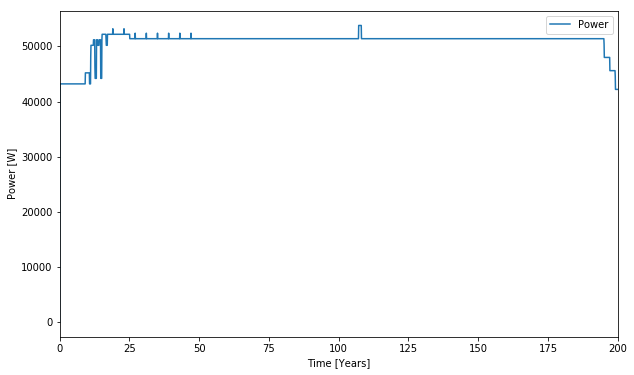

In [14]:
power_dat = pd.DataFrame({'Time': power.Time/12., 'Power': power.Value})
e1x = power_dat.plot(x='Time', y='Power', figsize=(10, 6))

#plt.ylim([0,1000000])
plt.xlabel('Time [Years]')
plt.ylabel('Power [W]')
plt.savefig('power.png', dpi=326)

In [7]:
power_PWR/power_SFR

,Time,Value
0,NaN,NaN
1,1.0,0.000000
2,1.0,0.000000
3,1.0,0.000000
4,1.0,0.000000
5,1.0,0.000000
6,1.0,0.000000
7,1.0,0.000000
8,1.0,0.000000
9,1.0,0.000000


In [15]:
blk_trans = com.transactions(ev, receivers=['FBR_in_blanket', 'FBR_out_blanket'])

blk_trans_out = com.transactions(ev, receivers=['FBR_out_blanket'])

blk_trans_in = com.transactions(ev, receivers=['FBR_in_blanket'])





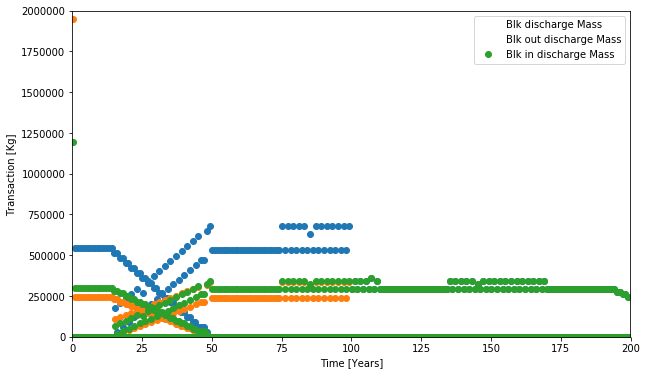

In [16]:
blk_trans_dat = pd.DataFrame({'Time': blk_trans.Time/12., 'Blk discharge Mass': blk_trans.Mass})
blk_trans_out_dat = pd.DataFrame({'Time': blk_trans_out.Time/12., 'Blk out discharge Mass': blk_trans_out.Mass})
blk_trans_in_dat = pd.DataFrame({'Time': blk_trans_in.Time/12., 'Blk in discharge Mass': blk_trans_in.Mass})




e1x = blk_trans_dat.plot(x='Time', y='Blk discharge Mass', figsize=(10, 6), linestyle=' ', marker='o')
blk_trans_out_dat.plot(x='Time', y='Blk out discharge Mass', ax=e1x, marker='o', linestyle=' ')

blk_trans_in_dat.plot(x='Time', y='Blk in discharge Mass', ax=e1x, marker='o', linestyle=' ')








#FBR_dr_trans_LEU_dat.plot(x='Time', y='LEU Mass', ax=e1x)




plt.ylim([0,2000000])
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')
plt.savefig('trans.png', dpi=326)

In [4]:
from cymetric import graphs

In [5]:
from cymetric import graphs
flow_graph = cym.graphs.flow_graph(ev, stop=1800)
flow_graph.render('flow', view=True)

'flow.pdf'

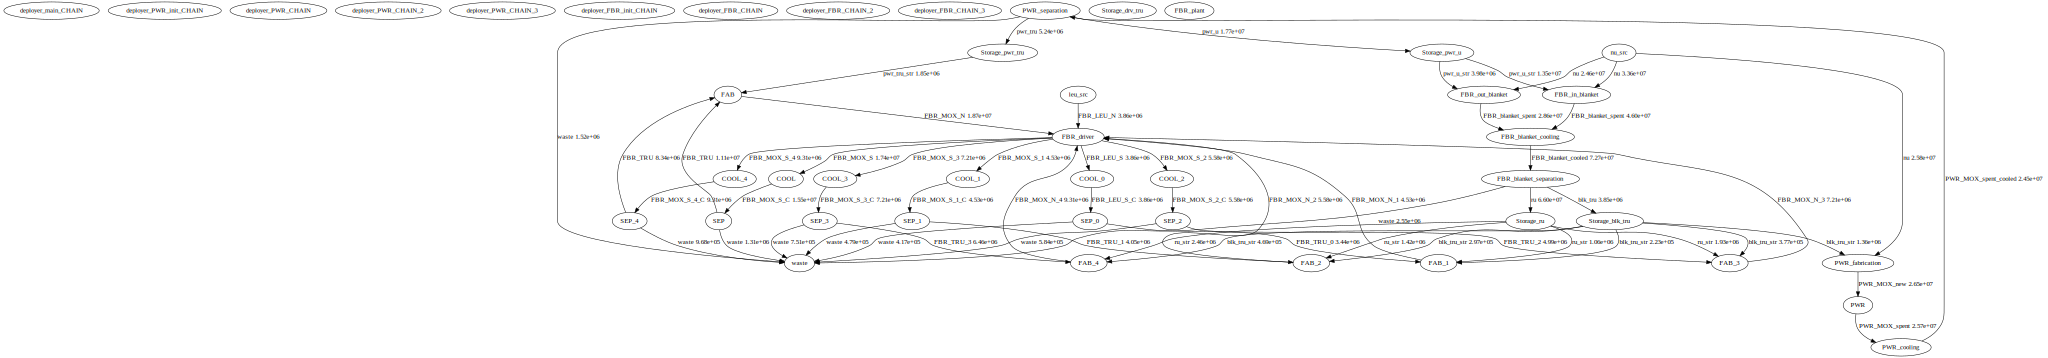

In [6]:
flow_graph